## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 50.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
mizani 0.11.4 requires pandas>=2.1.0, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
plotnine 0.13.6 requires pandas<3.0.0,>=2.1.0, but you have pandas 1.5.3

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

## Loading the dataset

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('Loan_Modelling.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## Data Overview

* Observations
* Sanity checks

In [3]:
data[data['Personal_Loan'] == 1].head(20)



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
42,43,32,7,132,90019,4,1.1,2,412,1,0,0,1,0
47,48,37,12,194,91380,4,0.2,3,211,1,1,1,1,1
53,54,50,26,190,90245,3,2.1,3,240,1,0,0,1,0
57,58,56,31,131,95616,2,1.2,3,0,1,0,0,0,0
75,76,31,7,135,94901,4,3.8,2,0,1,0,1,1,1


In [4]:
# prompt: find all the rows with 'Personal_loan' is 1

rows_with_personal_loan = data[data['Personal_Loan'] == 1]
print(rows_with_personal_loan)


        ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
9       10   34           9     180    93023       1    8.9          3   
16      17   38          14     130    95010       4    4.7          3   
18      19   46          21     193    91604       2    8.1          3   
29      30   38          13     119    94104       1    3.3          2   
38      39   42          18     141    94114       3    5.0          3   
...    ...  ...         ...     ...      ...     ...    ...        ...   
4883  4884   38          13     129    92646       3    4.1          3   
4927  4928   43          19     121    94720       1    0.7          2   
4941  4942   28           4     112    90049       2    1.6          2   
4962  4963   46          20     122    90065       3    3.0          3   
4980  4981   29           5     135    95762       3    5.3          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
9            0              1         

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [21]:
data['Personal_Loan'].unique()

array([0, 1])

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

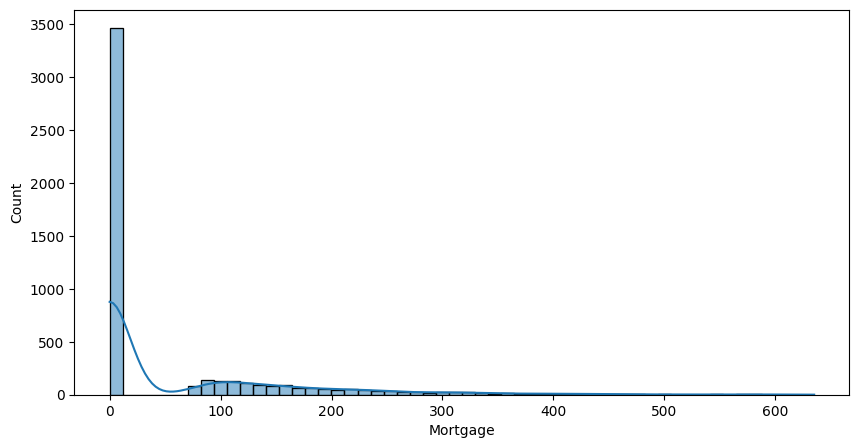

In [12]:
# What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(data['Mortgage'], kde=True)
plt.show()

In [ ]:
Observations:
1. Majority of the customers have no mortgage
2. Those who have mortgage have a right skewed distribution


In [13]:
#How many customers have credit cards?
data[data['CreditCard']>0]["ID"].count()

1470

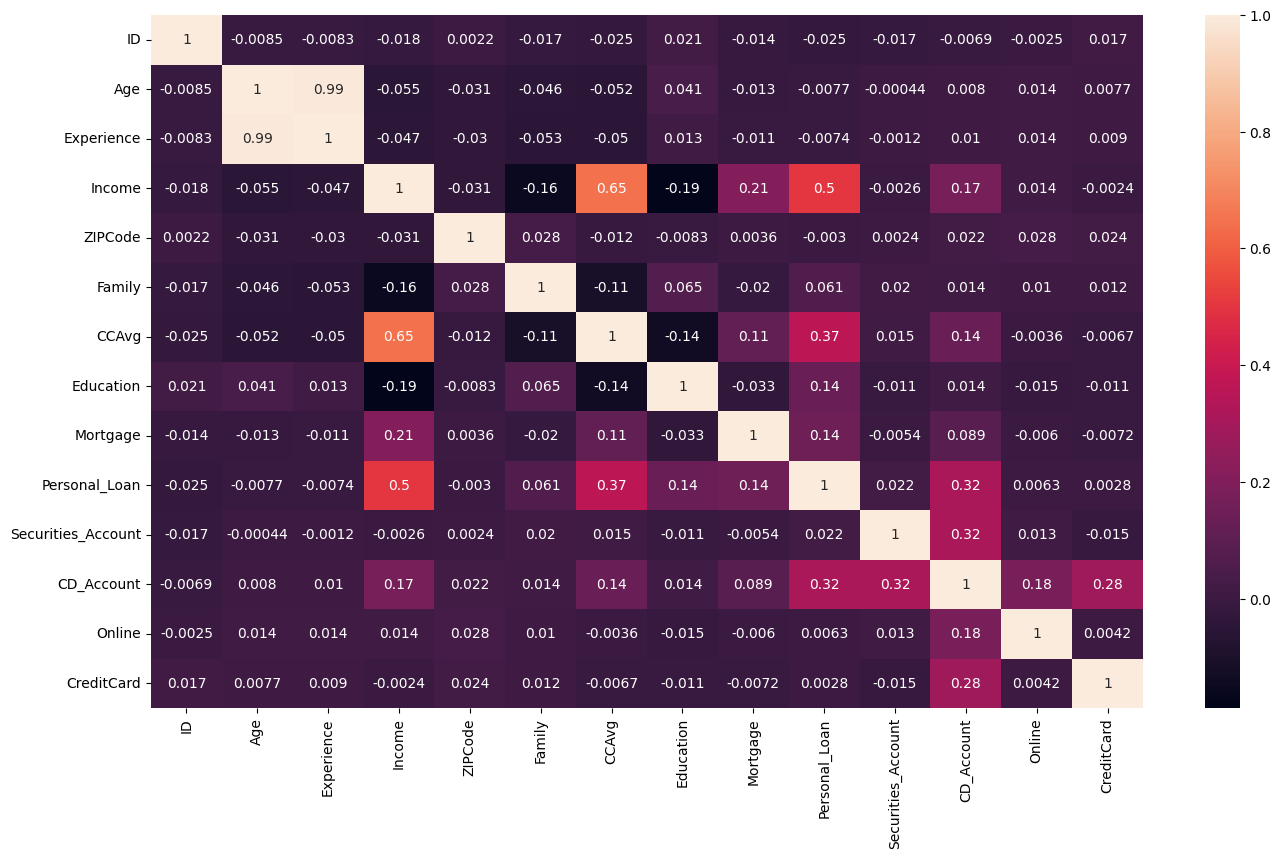

In [14]:
#What are the attributes that have a strong correlation with the target attribute (personal loan)?
corr = data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)
plt.show()

Personal load has strong correlation with Income and CCAvg

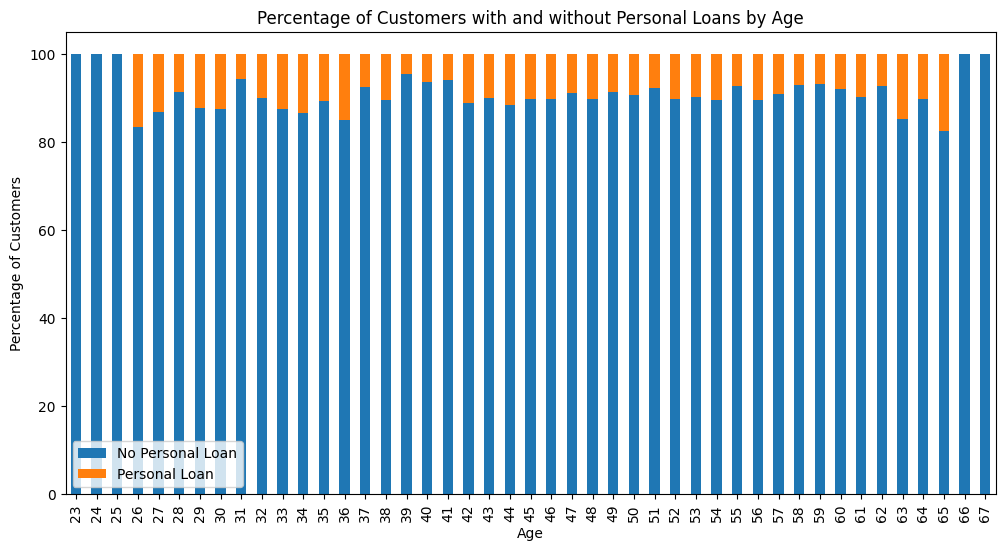

In [44]:
#How does a customer's interest in purchasing a loan vary with their age?

import matplotlib.pyplot as plt
# Group data by age and calculate the percentage of customers with and without personal loans
age_loan_counts = data.groupby(['Age', 'Personal_Loan'])['ID'].count().unstack()
age_loan_percentages = age_loan_counts.div(age_loan_counts.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = age_loan_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Age')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Percentage of Customers with and without Personal Loans by Age')
ax.legend(['No Personal Loan', 'Personal Loan'])

plt.show()


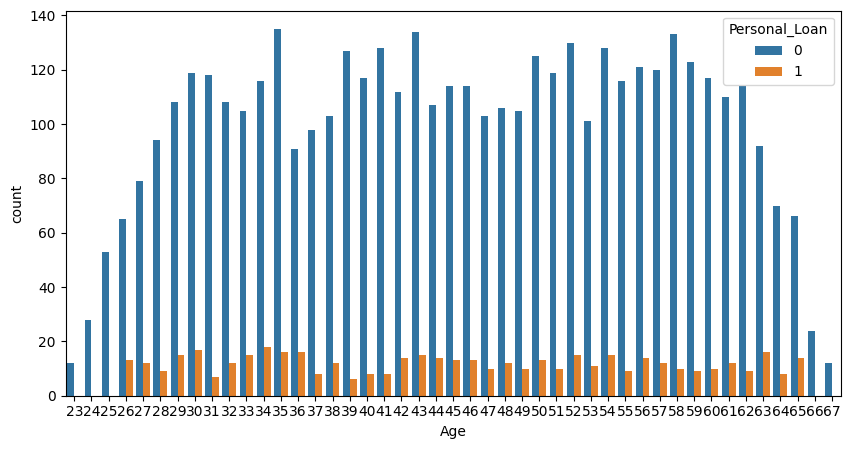

In [45]:

plt.figure(figsize=(10,5))
sns.countplot(data= data,x='Age', hue='Personal_Loan')
plt.show()


In [ ]:
Customers younger than

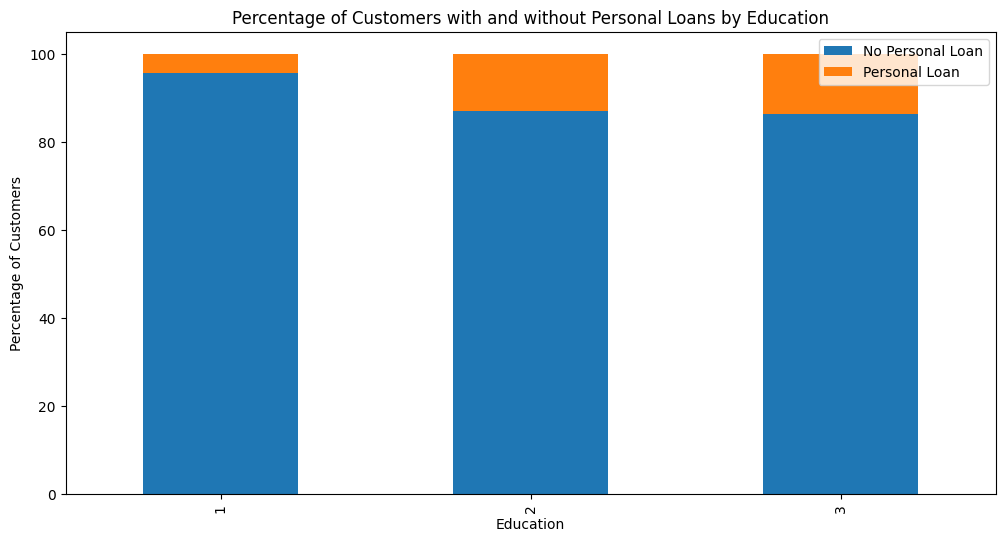

In [46]:
#How does a customer's interest in purchasing a loan vary with their education?

import matplotlib.pyplot as plt
# Group data by age and calculate the percentage of customers with and without personal loans
age_loan_counts = data.groupby(['Education', 'Personal_Loan'])['ID'].count().unstack()
age_loan_percentages = age_loan_counts.div(age_loan_counts.sum(axis=1), axis=0) * 100

# Create the bar plot
ax = age_loan_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
ax.set_xlabel('Education')
ax.set_ylabel('Percentage of Customers')
ax.set_title('Percentage of Customers with and without Personal Loans by Education')
ax.legend(['No Personal Loan', 'Personal Loan'])

plt.show()

In [ ]:
A customer with higher education has greater interest in purchasing a loan

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [47]:
data.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


Observation:
There are no data that is missing in any column

In [48]:
#Feature engineering (if needed)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations:
1. All the column data is numerical values.
2. There are no categorical values, hence no need to create dummies or remove columns.
3. There is no null values, hence no need to replace any data with mean values.

In [65]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

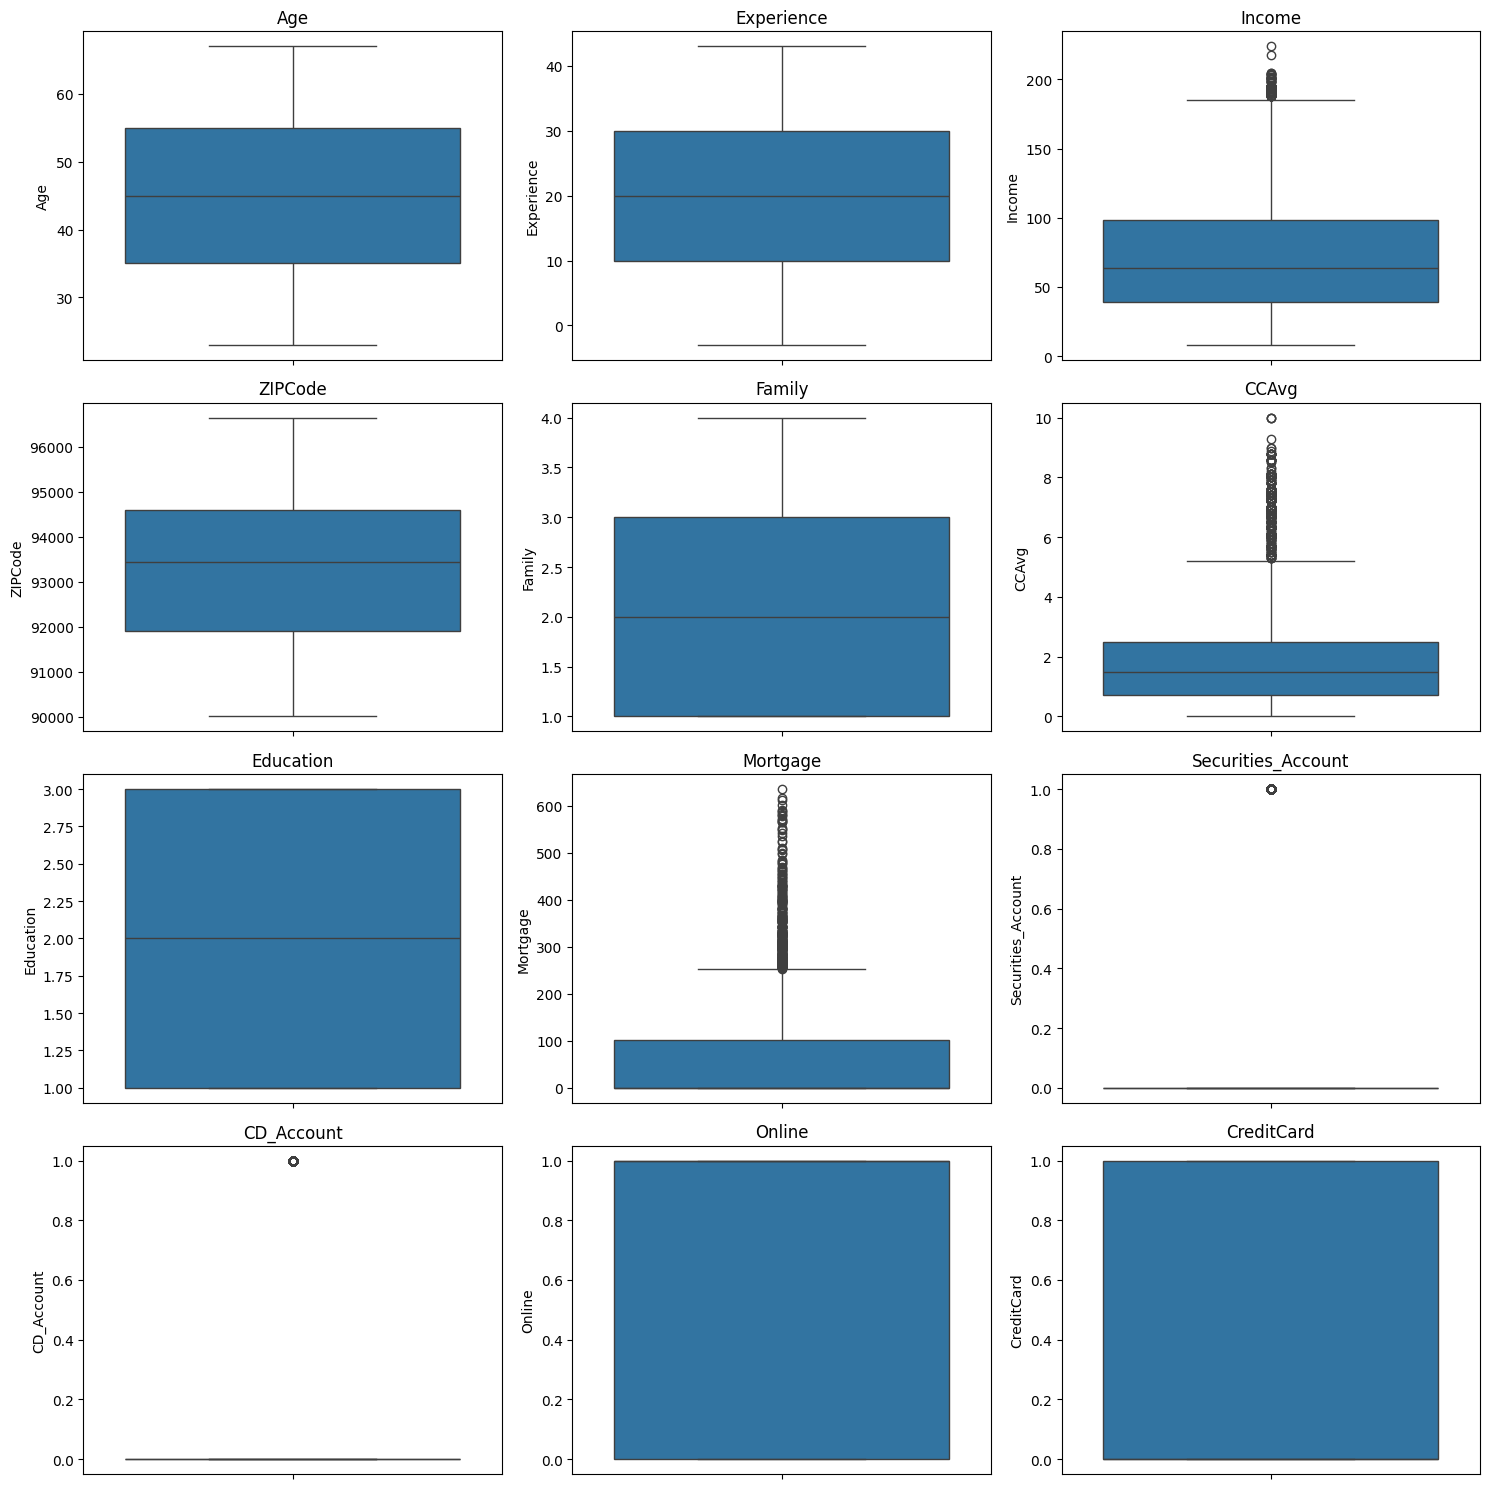

In [67]:
# prompt: create box plots for each column data in a 3 columned subplot

import matplotlib.pyplot as plt

# Create a figure with 3 columns of subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()
cols = [ 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage',  'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

# Iterate through the columns of the DataFrame and create a box plot for each
for i, column in enumerate(cols):
  sns.boxplot(y=data[column], ax=axes[i])
  axes[i].set_title(column)

# Remove any unused subplots
for i in range(len(cols), len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Observations:
1. Only CCAvg, Securities_Account and Online have outliers.
2. Rest of the columns data is within the ranges.

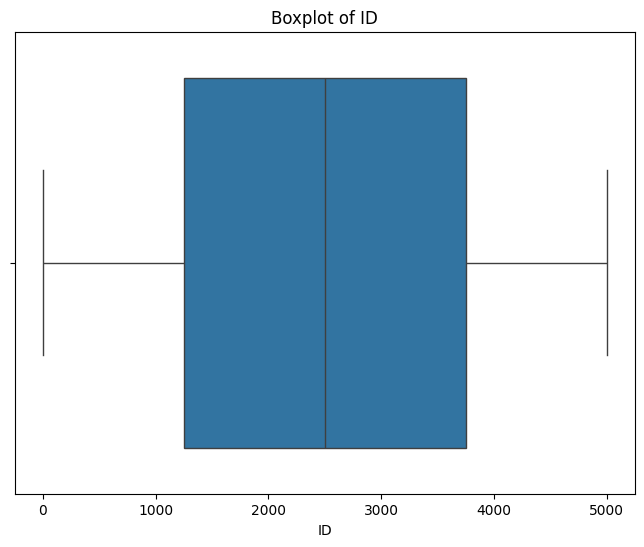

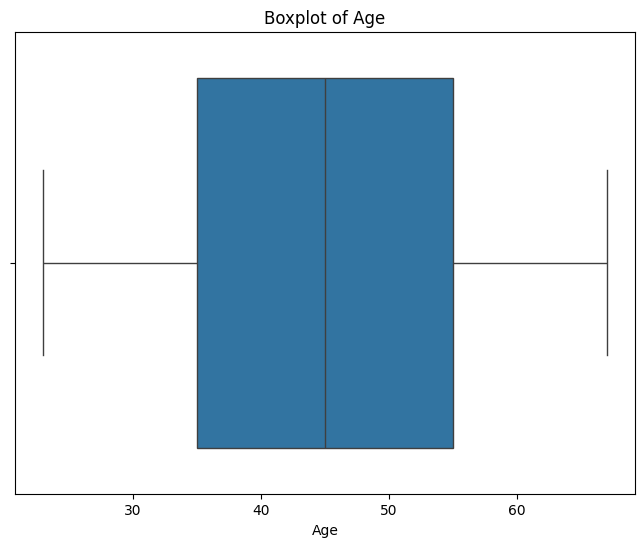

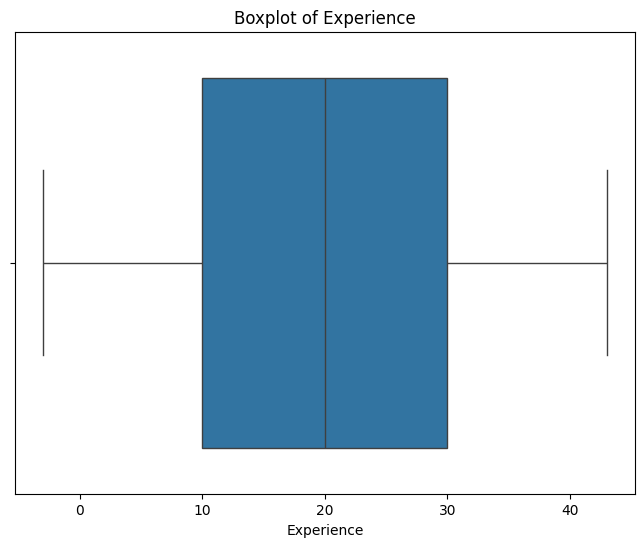

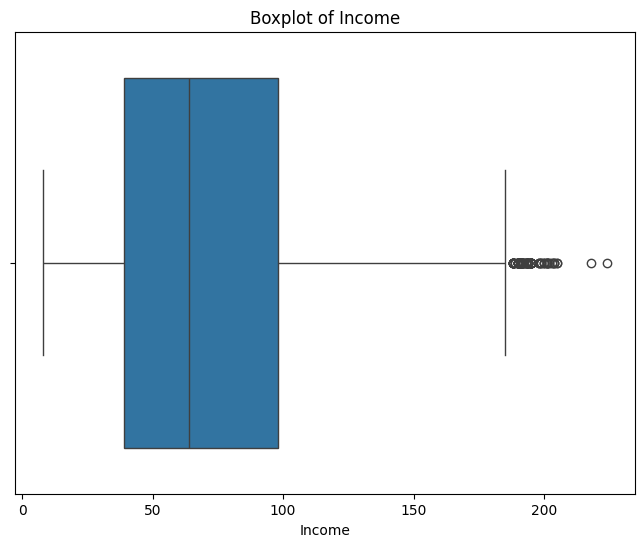

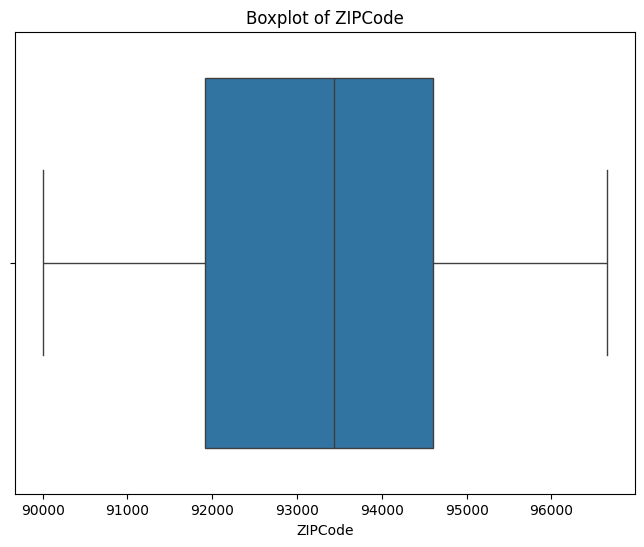

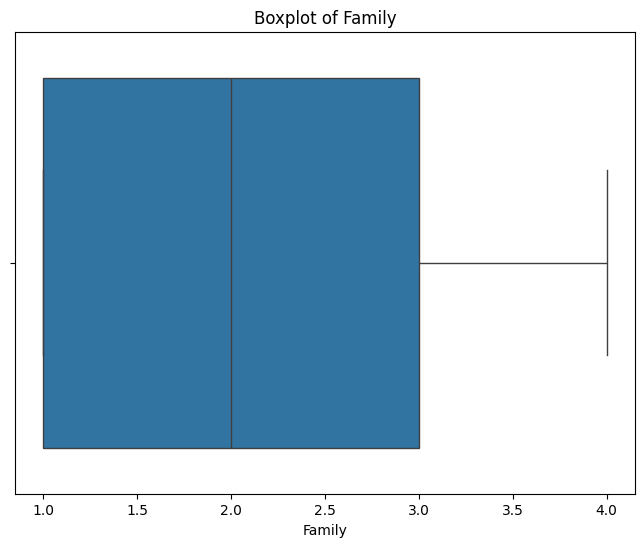

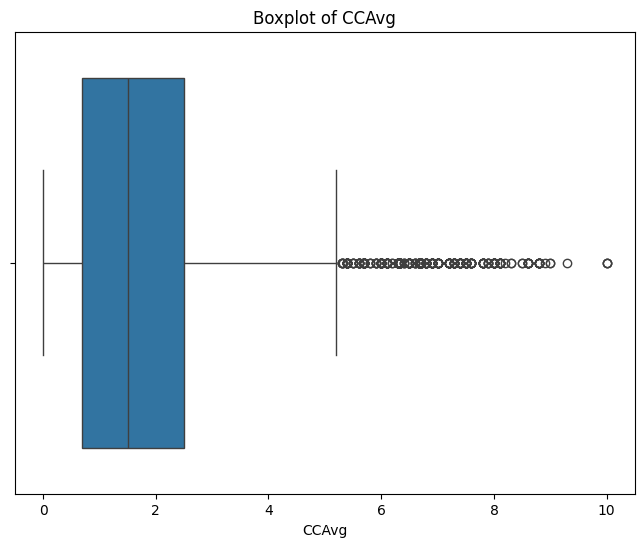

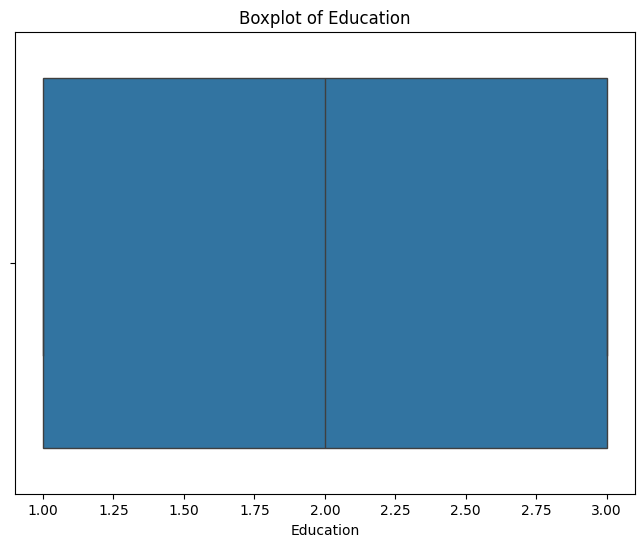

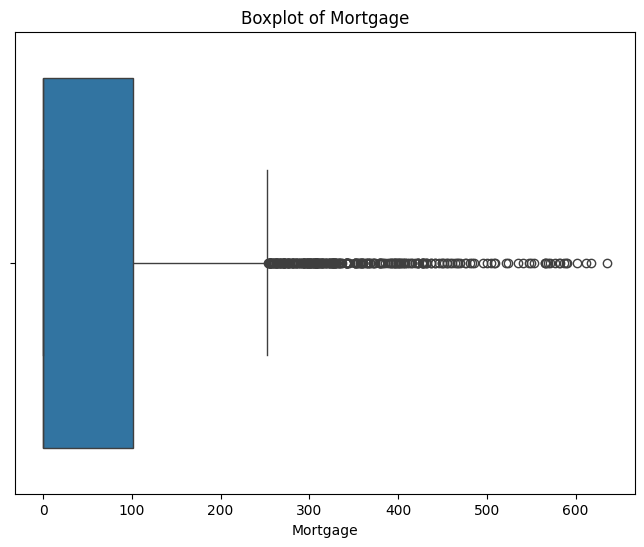

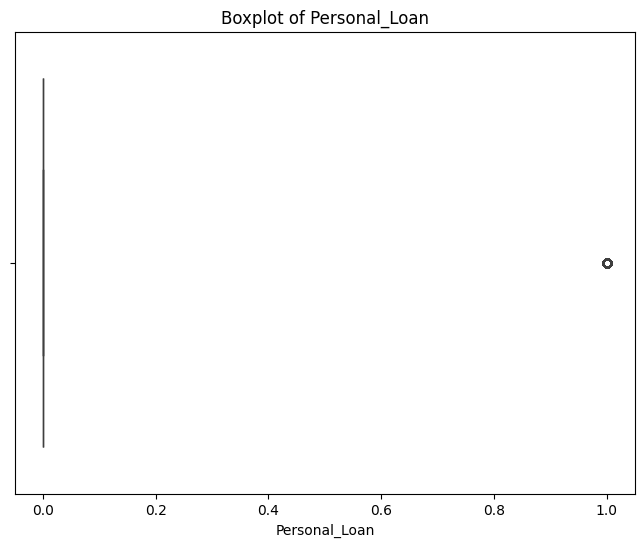

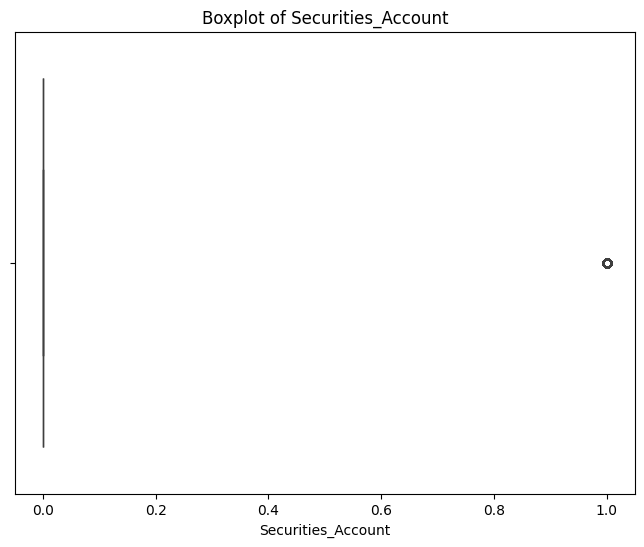

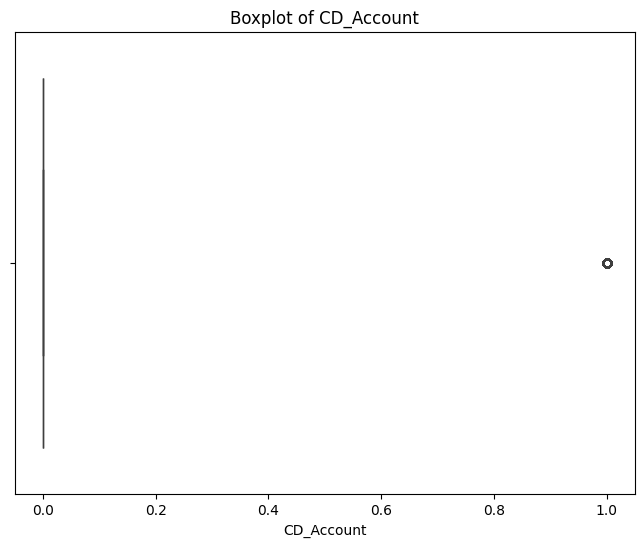

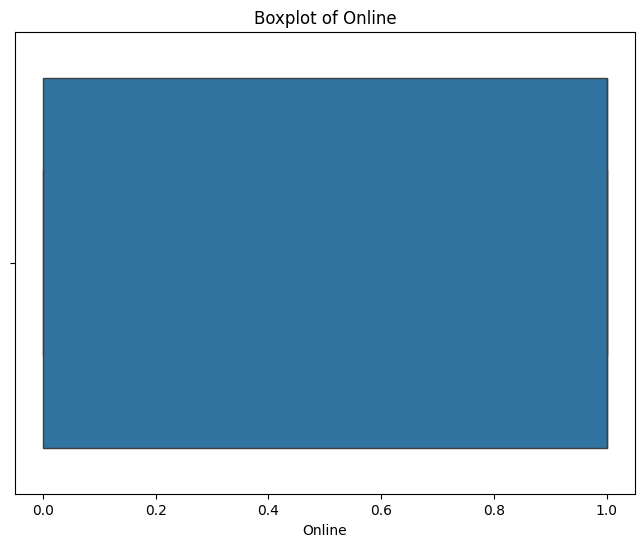

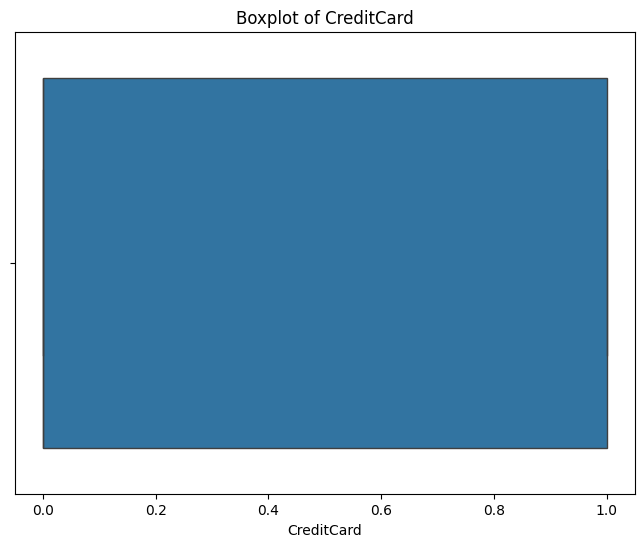

In [53]:
# prompt: create boxplots for each column data

import matplotlib.pyplot as plt
for column in data.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=data[column])
  plt.title(f'Boxplot of {column}')
  plt.show()


In [58]:
data.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

# prompt: show boxplot for each column data in a subplot of 3x3 grid

import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
cols = ['Age', 'Experience', 'Income',  'Family', 'CCAvg',
       'Education', 'Mortgage',  'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Personal_Loan']

# Iterate through the columns and create a boxplot for each one
for i, column in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[column], ax=axes[col, row])
    axes[row, col].set_title(f'Boxplot of {column}')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [56]:
# Outlier detection and treatment (if needed)
cols = data.columns

plt.figure(figsize=(5,5))

for i, col in enumerate[cols]:
    plt.subplot(3,3,i+1)
    sns.boxplot(data[col])
    plt.show()




TypeError: 'types.GenericAlias' object is not iterable

<Figure size 500x500 with 0 Axes>

In [10]:
data.shape

(5000, 14)

In [14]:
data.duplicated().sum()

0

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___